In [2]:
import pandas as pd
import numpy as np 
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from catboost import Pool
from matplotlib import pyplot as plt
from bayes_opt import BayesianOptimization
from mpl_toolkits.mplot3d import Axes3D
# import tensorflow as tf
# from keras import backend as K
# from keras import Sequential
# from keras.layers import Dense,Dropout,CuDNNLSTM,BatchNormalization
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

Using TensorFlow backend.


In [3]:
traindata = pd.read_csv("./train.csv")

traindata.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [4]:
def rmsexgb(real, predicted):
    sum1=0.0
    x = 0
    for ind,_ in real.iteritems():
        p = (predicted[x])
        r = (real[ind])
        sum1 = sum1 + (p - r)**2
        x+=1
    return (sum1/len(predicted))**0.5

In [5]:
traindata[traindata.target_2015!=0].eq(0).sum()/len(traindata[traindata.target_2015!=0])


X                                 0.000000
Y                                 0.000000
target_2015                       0.000000
elevation                         0.000000
precip 2014-11-16 - 2014-11-23    0.633996
precip 2014-11-23 - 2014-11-30    0.738156
precip 2014-11-30 - 2014-12-07    0.759494
precip 2014-12-07 - 2014-12-14    0.000000
precip 2014-12-14 - 2014-12-21    0.000000
precip 2014-12-21 - 2014-12-28    0.000000
precip 2014-12-28 - 2015-01-04    0.000000
precip 2015-01-04 - 2015-01-11    0.000000
precip 2015-01-11 - 2015-01-18    0.000000
precip 2015-01-18 - 2015-01-25    0.315009
precip 2015-01-25 - 2015-02-01    0.000000
precip 2015-02-01 - 2015-02-08    0.000000
precip 2015-02-08 - 2015-02-15    0.000000
precip 2015-02-15 - 2015-02-22    0.000000
precip 2015-02-22 - 2015-03-01    0.000000
precip 2015-03-01 - 2015-03-08    0.000000
precip 2015-03-08 - 2015-03-15    0.633996
precip 2019-01-20 - 2019-01-27    0.000000
precip 2019-01-27 - 2019-02-03    0.291501
precip 2019

In [6]:
print(traindata[traindata.target_2015==0].eq(0).sum()/len(traindata[traindata.target_2015==0]))


X                                 0.000000
Y                                 0.000000
target_2015                       1.000000
elevation                         0.000000
precip 2014-11-16 - 2014-11-23    0.597256
precip 2014-11-23 - 2014-11-30    0.814685
precip 2014-11-30 - 2014-12-07    0.857821
precip 2014-12-07 - 2014-12-14    0.000000
precip 2014-12-14 - 2014-12-21    0.000000
precip 2014-12-21 - 2014-12-28    0.000000
precip 2014-12-28 - 2015-01-04    0.000000
precip 2015-01-04 - 2015-01-11    0.000000
precip 2015-01-11 - 2015-01-18    0.000000
precip 2015-01-18 - 2015-01-25    0.255748
precip 2015-01-25 - 2015-02-01    0.000000
precip 2015-02-01 - 2015-02-08    0.000000
precip 2015-02-08 - 2015-02-15    0.000000
precip 2015-02-15 - 2015-02-22    0.000000
precip 2015-02-22 - 2015-03-01    0.000000
precip 2015-03-01 - 2015-03-08    0.000000
precip 2015-03-08 - 2015-03-15    0.883147
precip 2019-01-20 - 2019-01-27    0.000000
precip 2019-01-27 - 2019-02-03    0.144734
precip 2019

the data is 39 columns, 17 columns for the train set (17 weeks before the flood 2015 ) , 17 columns for the test set (weeks before the flodd 2019) and 4 common columns between the two sets  (elevation , LC_Type1_mode(I don't know what that is) ,x,y coordinates) and finally the target 2015

In [7]:
squareid = traindata.Square_ID
traindata.drop(["Square_ID"],inplace=True,axis=1)

In [7]:
traindata.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-0

In [8]:
testcolumns = []
commoncolumns = []
traincolumns = []
for i in range(len(traindata.columns)):
    if "2019" in traindata.columns[i] :
        testcolumns.append(traindata.columns[i])
    elif "_2015" in traindata.columns[i] :
        continue
    elif "2015" in traindata.columns[i] or "2014" in traindata.columns[i] :
        traincolumns.append(traindata.columns[i])
    else :
        commoncolumns.append(traindata.columns[i])

In [9]:
# scaler = StandardScaler()
# Xtrainlstmscaled = scaler.fit_transform(Xtraincatboost)
# Xtrainlstmscaled = pd.DataFrame(Xtrainlstmscaled,columns=Xtraincatboost.columns)
# # Xtestlstmscaled = scaler.transform(Xtest)

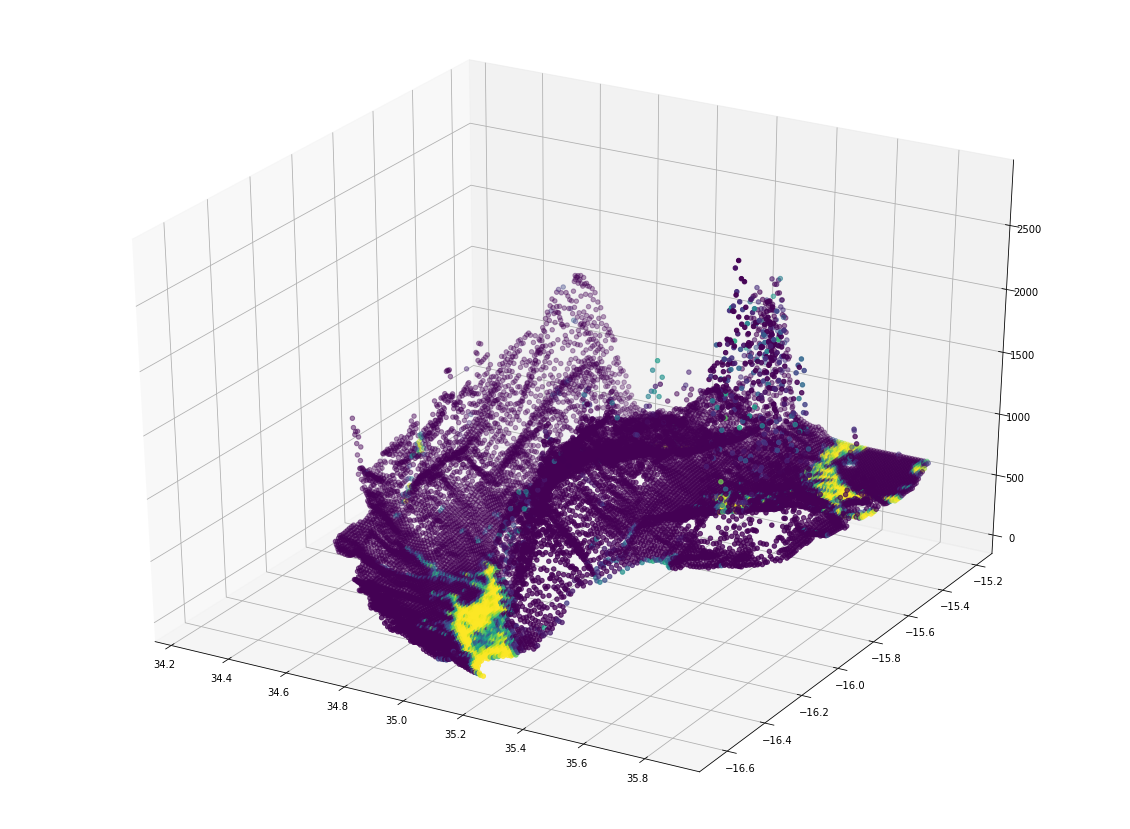

In [11]:
# cm = plt.get_cmap("RdYlGn")
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(traindata.X))
#just for fun 

ax.scatter(traindata.X,traindata.Y,zs=traindata.elevation, c=traindata.target_2015, marker='o')
# plt.figure(figsize=(20,20))
# plt.scatter(traindata[traindata.target_2015==0].X,traindata[traindata.target_2015==0].Y)

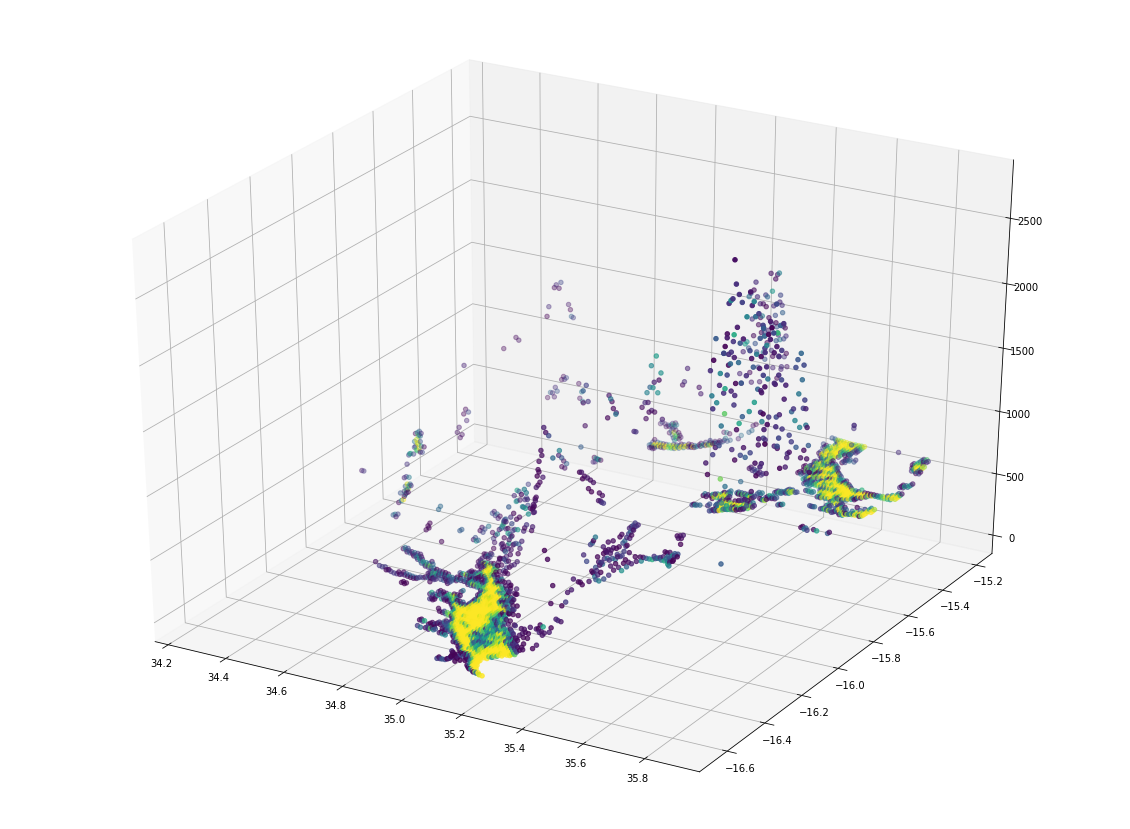

In [10]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(traindata[traindata.target_2015>0].X,traindata[traindata.target_2015>0].Y,zs=traindata[traindata.target_2015>0].elevation,c=traindata[traindata.target_2015 > 0].target_2015, marker='o')
# plt.figure(figsize=(20,20))
# plt.scatter(traindata[traindata.target_2015==0].X,traindata[traindata.target_2015==0].Y)

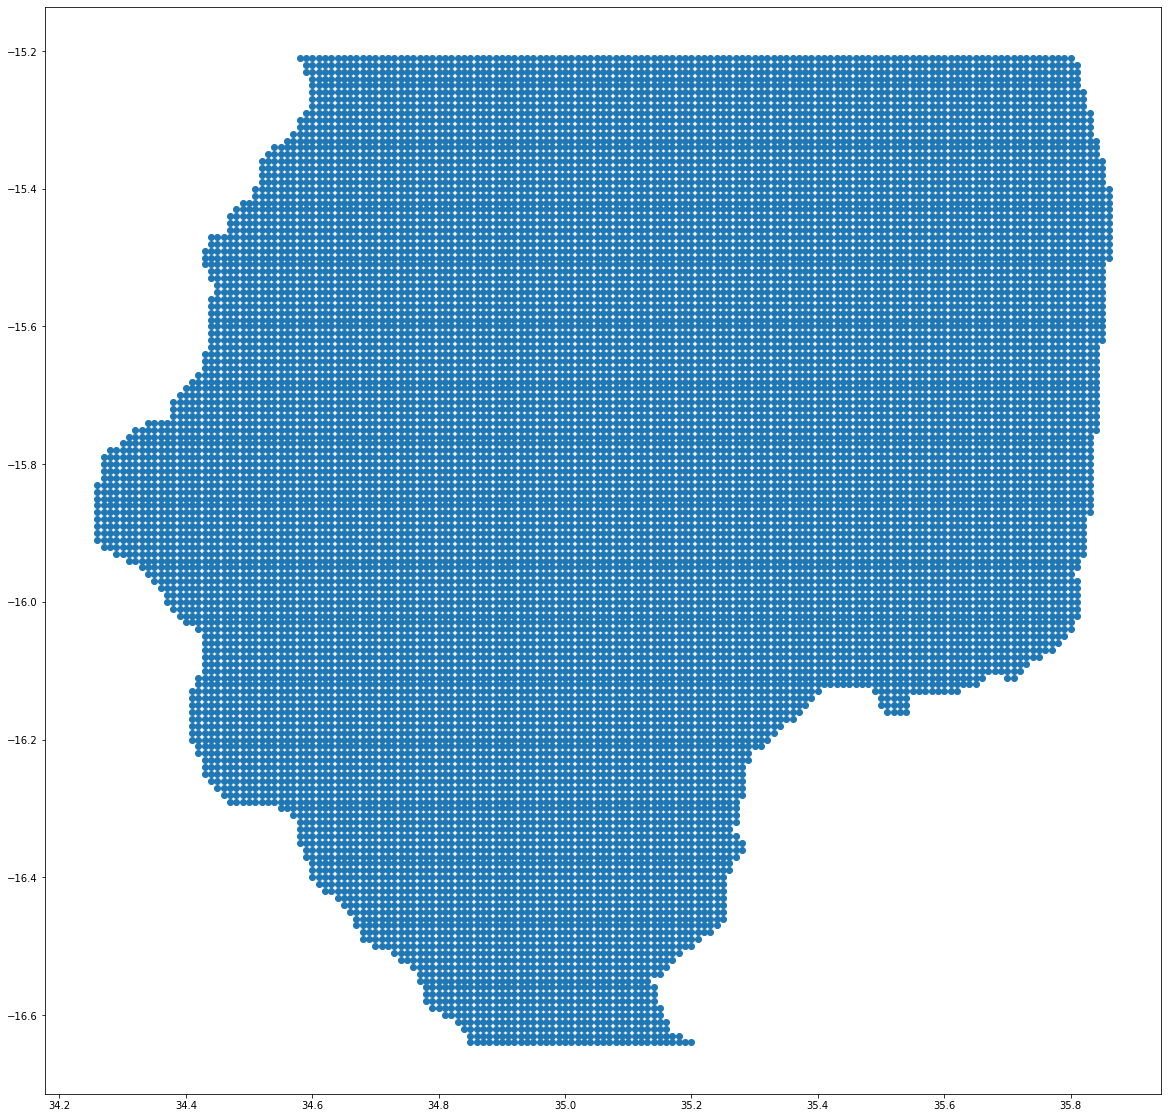

In [11]:
plt.figure(figsize=(20,20))
plt.scatter(traindata.X,traindata.Y)

In [15]:
traindata.eq(0).sum()/(len(traindata))

X                                 0.000000
Y                                 0.000000
target_2015                       0.832078
elevation                         0.000000
precip 2014-11-16 - 2014-11-23    0.603425
precip 2014-11-23 - 2014-11-30    0.801834
precip 2014-11-30 - 2014-12-07    0.841309
precip 2014-12-07 - 2014-12-14    0.000000
precip 2014-12-14 - 2014-12-21    0.000000
precip 2014-12-21 - 2014-12-28    0.000000
precip 2014-12-28 - 2015-01-04    0.000000
precip 2015-01-04 - 2015-01-11    0.000000
precip 2015-01-11 - 2015-01-18    0.000000
precip 2015-01-18 - 2015-01-25    0.265699
precip 2015-01-25 - 2015-02-01    0.000000
precip 2015-02-01 - 2015-02-08    0.000000
precip 2015-02-08 - 2015-02-15    0.000000
precip 2015-02-15 - 2015-02-22    0.000000
precip 2015-02-22 - 2015-03-01    0.000000
precip 2015-03-01 - 2015-03-08    0.000000
precip 2015-03-08 - 2015-03-15    0.841309
precip 2019-01-20 - 2019-01-27    0.000000
precip 2019-01-27 - 2019-02-03    0.169379
precip 2019

In [ ]:
#  common3d = Xtrainlstmscaled[commoncolumns].to_numpy().reshape(len(traindata),1,4) +np.zeros((len(traindata),17,4))
# traintimedata = Xtrainlstmscaled[traincolumns].to_numpy().reshape((len(traindata),17,1)) 
# traintimedata = np.concatenate((traintimedata,common3d),axis=2)

In [8]:

def targetClass(x):
    return 1 if x>0 else 0

ytrainlstm = traindata["target_2015"]
ytraincatboost = traindata["target_2015"]
classtarget = traindata["target_2015"].apply(targetClass) # this line is useful for the modeling process 

Xtraincatress = traindata[traincolumns+commoncolumns]
Xtraincatress.classtarget = classtarget
Xtraincatboost = traindata[traincolumns+commoncolumns]


C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [14]:
len(classtarget[classtarget==1])/len(classtarget)

0.1679217782096441

In [15]:
Xtest = traindata[testcolumns+commoncolumns]
Xtestlstm = traindata[testcolumns+commoncolumns]

In [16]:
Xtest.eq(0).sum()/(len(Xtest))

precip 2019-01-20 - 2019-01-27    0.000000
precip 2019-01-27 - 2019-02-03    0.169379
precip 2019-02-03 - 2019-02-10    0.000000
precip 2019-02-10 - 2019-02-17    0.000000
precip 2019-02-17 - 2019-02-24    0.000000
precip 2019-02-24 - 2019-03-03    0.374104
precip 2019-03-03 - 2019-03-10    0.000000
precip 2019-03-10 - 2019-03-17    0.119762
precip 2019-03-17 - 2019-03-24    0.000000
precip 2019-03-24 - 2019-03-31    0.369185
precip 2019-03-31 - 2019-04-07    0.503279
precip 2019-04-07 - 2019-04-14    0.344224
precip 2019-04-14 - 2019-04-21    0.117454
precip 2019-04-21 - 2019-04-28    0.788595
precip 2019-04-28 - 2019-05-05    0.823637
precip 2019-05-05 - 2019-05-12    0.896757
precip 2019-05-12 - 2019-05-19    0.801895
X                                 0.000000
Y                                 0.000000
elevation                         0.000000
LC_Type1_mode                     0.000000
dtype: float64

The commentted code is for the LSTM 

In [ ]:
len(ytrainlstm)

In [9]:
# xtlstm,xplstm,ytlstm,yplstm = train_test_split(Xtrainlstmscaled,ytrainlstm,test_size=0.2,shuffle=False)
xt,xp,yt,yp = train_test_split(Xtraincatress,ytraincatboost,test_size=0.4,shuffle=True)
xtclass,xpclass,ytclass,ypclass = train_test_split(Xtraincatboost,classtarget,test_size=0.4,shuffle=True)

In [12]:
len(ytclass[ytclass == 1])/len(ytclass)

0.16600870533454803

In [11]:
len(ypclass[ypclass == 1])/len(ypclass) # almost the same

0.17079095187490512

In [10]:
def rmsek(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


In [ ]:
# ynp = ytrainlstm[int(len(traintimedata)*0.8):][ytrainlstm[int(len(traintimedata)*0.8):]>0]
# xnp = traintimedata[int(len(traintimedata)*0.8):][ytrainlstm[int(len(traintimedata)*0.8):]>0]
# xnt = traintimedata[:int(len(traintimedata)*0.8)][ytrainlstm[:int(len(traintimedata)*0.8)]>0]
# ynt = ytrainlstm[:int(len(traintimedata)*0.8)][ytrainlstm[:int(len(traintimedata)*0.8)]>0]



In [ ]:
# nn = Sequential()

# nn.add(CuDNNLSTM(128,input_shape=(17,5),return_sequences=True))
# nn.add(BatchNormalization())
# nn.add(Dropout(0.2))
# nn.add(CuDNNLSTM(0.2,return_sequences=True))
# nn.add(BatchNormalization())
# nn.add(Dropout(0.2))
# nn.add(CuDNNLSTM(64))
# nn.add(Dropout(0.2))
# nn.add(Dense(64,activation="relu"))
# nn.add(BatchNormalization())
# nn.add(Dropout(0.2))
# nn.add(Dense(1,activation="relu"))


nn.add(Dense(128,activation="relu"))
nn.add(Dense(128,activation="relu"))

# opt = optimizers.Adam(lr=0.0001)
# nn.compile(optimizer=opt,loss=rmsek)



In [15]:
catopinion = CatBoostRegressor(iterations = 1200,random_state=42,learning_rate =0.06,max_depth=10,l2_leaf_reg=0.8,subsample=0.7,colsample_bylevel=1.0)
# valset = Pool([yp>0].to_numpy(),yp[yp>0].to_numpy())
catopinion.fit(Xtraincatress.to_numpy(),ytraincatboost.to_numpy(),verbose=500)

0:	learn: 0.2206632	total: 185ms	remaining: 3m 41s
500:	learn: 0.0690708	total: 1m 11s	remaining: 1m 40s
1000:	learn: 0.0518843	total: 2m 25s	remaining: 29s
1199:	learn: 0.0472909	total: 2m 55s	remaining: 0us


In [20]:
ft = catopinion.predict(xtclass)
fp = catopinion.predict(xpclass)
xtclass["opinion"] = pd.Series(ft)
xpclass["opinion"] = pd.Series(fp)

C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\m\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
# hist = nn.fit(xnt,ynt,validation_data=(xnp,ynp),epochs=20)


In [16]:
# hist.history["val_loss"][0]

In [59]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
# this cell is for prediction which was the trick that got me some score 
# since most values of the target variable which is claimed to be a continuos one are equal to zero you can see that in the trainning set 
# so I trained two different models one for classification with an adjusted target variable so if there is no flood on that square the target is equal to zero and it's equal to one in the opposite condition
# the second one is for predicting the continous value if the first model predicted that the flood will get to that square
preds = []
for i in range(len(Xtest)):
    pred = cat.predict(Xtest.iloc[i].to_numpy())    
    if pred == 1 :
        test = Xtest.iloc[i]
        test.classtarget=1
        pred = catress.predict(test.to_numpy())
    preds.append(pred)
    


In [60]:
len(pd.Series(preds)[pd.Series(preds)>0])/len(pd.Series(preds))

0.05089274869427912

In [54]:
def traincatboost(learning_rate,max_depth,l2_leaf_reg,colsample_bylevel,subsample):
#     trainset = Pool(data=X[targetted[:20]].iloc[:2250],label=y.iloc[:2250])
    validation = Pool(data=xp.to_numpy(),label=yp.to_numpy())
    catress =  CatBoostRegressor(use_best_model=False,iterations=1200,random_state=42,learning_rate=learning_rate,subsample = subsample,max_depth=int(round(max_depth)),l2_leaf_reg =l2_leaf_reg,colsample_bylevel=colsample_bylevel,early_stopping_rounds=800)
    catress.fit(xt.to_numpy(), yt.to_numpy(),eval_set=validation,verbose=500)
    preds = catress.predict(xp.to_numpy())
    return -rmsexgb(yp,preds)

bounds = {
    'max_depth':(5,10),
#     'min_rows':(10,30),
    'l2_leaf_reg':(0.1,0.8),
    'learning_rate':(0.001, 0.06),
#     'sample_rate':(0.5,0.8),
     'colsample_bylevel': (0.3,1),
    'subsample' : (0.7,1)
}
optimizer = BayesianOptimization(
    f=traincatboost,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=12, n_iter=30)


|   iter    |  target   | colsam... | l2_lea... | learni... | max_depth | subsample |
-------------------------------------------------------------------------------------
0:	learn: 0.2228143	test: 0.2370745	best: 0.2370745 (0)	total: 79.6ms	remaining: 1m 35s
500:	learn: 0.1800019	test: 0.1888447	best: 0.1888447 (500)	total: 9.62s	remaining: 13.4s
1000:	learn: 0.1575534	test: 0.1631710	best: 0.1631710 (1000)	total: 19.3s	remaining: 3.84s
1199:	learn: 0.1517808	test: 0.1565858	best: 0.1565858 (1199)	total: 22.7s	remaining: 0us

bestTest = 0.1565858177
bestIteration = 1199

|  1        | -0.1566   |  0.5919   |  0.6042   |  0.001007 |  6.512    |  0.744    |
0:	learn: 0.2207581	test: 0.2347562	best: 0.2347562 (0)	total: 10.3ms	remaining: 12.3s
500:	learn: 0.1042010	test: 0.1141809	best: 0.1141809 (500)	total: 5.54s	remaining: 7.72s
1000:	learn: 0.0871061	test: 0.1056945	best: 0.1056945 (1000)	total: 11.5s	remaining: 2.28s
1199:	learn: 0.0831144	test: 0.1043054	best: 0.1043024 (1198)	tota

|  15       | -0.1006   |  1.0      |  0.8      |  0.06     |  5.0      |  1.0      |
0:	learn: 0.2154597	test: 0.2289080	best: 0.2289080 (0)	total: 19.9ms	remaining: 23.8s
500:	learn: 0.0699118	test: 0.1002273	best: 0.1002112 (493)	total: 11.6s	remaining: 16.2s
1000:	learn: 0.0512279	test: 0.0973223	best: 0.0973097 (996)	total: 23.1s	remaining: 4.59s
1199:	learn: 0.0462592	test: 0.0967846	best: 0.0967782 (1198)	total: 27.4s	remaining: 0us

bestTest = 0.09677819143
bestIteration = 1198

|  16       | -0.09678  |  0.3      |  0.1      |  0.06     |  8.887    |  1.0      |
0:	learn: 0.2164803	test: 0.2298986	best: 0.2298986 (0)	total: 32.9ms	remaining: 39.4s
500:	learn: 0.0659056	test: 0.0997790	best: 0.0997790 (500)	total: 14.6s	remaining: 20.4s
1000:	learn: 0.0464228	test: 0.0970481	best: 0.0970111 (955)	total: 29s	remaining: 5.77s
1199:	learn: 0.0412569	test: 0.0967377	best: 0.0967239 (1192)	total: 35.2s	remaining: 0us

bestTest = 0.09672391316
bestIteration = 1192

|  17       | -0.0

|  30       | -0.1606   |  1.0      |  0.8      |  0.001    |  5.422    |  0.7      |
0:	learn: 0.2167539	test: 0.2300971	best: 0.2300971 (0)	total: 11.2ms	remaining: 13.4s
500:	learn: 0.0837827	test: 0.1047532	best: 0.1047532 (500)	total: 4.6s	remaining: 6.42s
1000:	learn: 0.0690146	test: 0.1008721	best: 0.1008704 (999)	total: 9.34s	remaining: 1.86s
1199:	learn: 0.0648868	test: 0.0998565	best: 0.0998557 (1197)	total: 11.3s	remaining: 0us

bestTest = 0.09985570664
bestIteration = 1197

|  31       | -0.09986  |  0.3      |  0.8      |  0.06     |  6.853    |  1.0      |
0:	learn: 0.2157825	test: 0.2294083	best: 0.2294083 (0)	total: 23.5ms	remaining: 28.2s
500:	learn: 0.0701233	test: 0.0986908	best: 0.0986908 (500)	total: 7.88s	remaining: 11s
1000:	learn: 0.0519231	test: 0.0949496	best: 0.0949496 (1000)	total: 15.3s	remaining: 3.05s
1199:	learn: 0.0471982	test: 0.0943119	best: 0.0943119 (1199)	total: 18.3s	remaining: 0us

bestTest = 0.09431186019
bestIteration = 1199

|  32       | -0.0

In [55]:
optimizer.max

{'target': -0.09408123561698897,
 'params': {'colsample_bylevel': 1.0,
  'l2_leaf_reg': 0.8,
  'learning_rate': 0.06,
  'max_depth': 10.0,
  'subsample': 0.7}}

In [57]:
catress = CatBoostRegressor(iterations = 1200,learning_rate =0.06,max_depth=10,l2_leaf_reg=0.8,subsample=0.7,colsample_bylevel=1.0)
# valset = Pool([yp>0].to_numpy(),yp[yp>0].to_numpy())
catress.fit(Xtraincatress[ytraincatboost>0].to_numpy(),ytraincatboost[ytraincatboost>0].to_numpy(),verbose=500)

0:	learn: 0.3619610	total: 52.9ms	remaining: 1m 3s
500:	learn: 0.1222984	total: 20.9s	remaining: 29.2s
1000:	learn: 0.0845332	total: 42.2s	remaining: 8.38s
1199:	learn: 0.0744078	total: 50.2s	remaining: 0us


[18.410019475807466, 14.063566507440965, 17.11237583732989, 44.14669276569841, 6.26734541372325]


<BarContainer object of 5 artists>

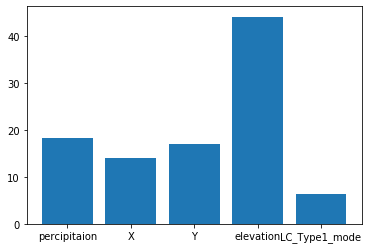

In [51]:
importances = catress.get_feature_importance()
s = 0
for i in importances[:17]:
    s+= i
importances = [s]+importances[17:].tolist()
print(importances)
# print(percipitation)
# importances=[[percipitation]+importances[17:]]
# print(importances)
# plt.figure(figsize=(20,10))

plt.bar(["percipitaion"]+commoncolumns,importances)


In [36]:
# cat = CatBoostClassifier(iterations = 700,random_state=42,learning_rate =0.06,colsample_bylevel=0.999999,max_depth=10,l2_leaf_reg=0.8,eval_metric="Accuracy",subsample=1.0)
# # valset = Pool(xpclass.to_numpy(),ypclass.to_numpy())
# cat.fit(Xtraincatboost.to_numpy(),classtarget.to_numpy(),plot=True,verbose=500) # for better accuracy I used the whole training data to train this model 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8994838	test: 0.8887202	best: 0.8887202 (0)	total: 108ms	remaining: 1m 15s
500:	learn: 0.9892702	test: 0.9301655	best: 0.9303173 (377)	total: 42.9s	remaining: 17.1s
699:	learn: 0.9965584	test: 0.9327463	best: 0.9330499 (690)	total: 59.9s	remaining: 0us

bestTest = 0.9330499469
bestIteration = 690

Shrink model to first 691 iterations.


In [ ]:
preds = cat.predict(Xtest.to_numpy())

In [21]:
def traincatcls(learning_rate,max_depth,l2_leaf_reg,colsample_bylevel,subsample): #for optimizing the classification model 
#     trainset = Pool(data=X[targetted[:20]].iloc[:2250],label=y.iloc[:2250])
    validation = Pool(data=xpclass.to_numpy(),label=ypclass.to_numpy())
    catcls =  CatBoostClassifier(use_best_model=False,iterations=1500,random_state=42,learning_rate=learning_rate,subsample = subsample,max_depth=int(round(max_depth)),eval_metric="Accuracy",l2_leaf_reg =l2_leaf_reg,colsample_bylevel=colsample_bylevel,early_stopping_rounds=800)   
    catcls.fit(xtclass.to_numpy(), ytclass.to_numpy(),eval_set=validation,verbose=500)
#     preds = rf.predict(xpclass.to_numpy())
    return catcls.score(validation)
bounds = {
    'max_depth':(5,10),
#     'min_rows':(10,30),
    'l2_leaf_reg':(0.1,0.8),
    'learning_rate':(0.001, 0.07),
#     'sample_rate':(0.5,0.8),
     'colsample_bylevel': (0.3,1),
    'subsample' : (0.7,1)
}
optimizer = BayesianOptimization(
    f=traincatcls,
    pbounds=bounds,
    random_state=1,
)
optimizer.maximize(init_points=12, n_iter=40)



|   iter    |  target   | colsam... | l2_lea... | learni... | max_depth | subsample |
-------------------------------------------------------------------------------------
0:	learn: 0.8831866	test: 0.8788523	best: 0.8788523 (0)	total: 92.5ms	remaining: 2m 18s
500:	learn: 0.8983703	test: 0.8958555	best: 0.8961591 (475)	total: 11.4s	remaining: 22.8s
1000:	learn: 0.9014070	test: 0.8979809	best: 0.8984363 (917)	total: 19.1s	remaining: 9.51s
1499:	learn: 0.9028242	test: 0.8985881	best: 0.8985881 (1470)	total: 26.5s	remaining: 0us

bestTest = 0.8985881281
bestIteration = 1470

|  1        |  0.8986   |  0.5919   |  0.6042   |  0.001008 |  6.512    |  0.744    |
0:	learn: 0.8822755	test: 0.8788523	best: 0.8788523 (0)	total: 22.1ms	remaining: 33.2s
500:	learn: 0.9382529	test: 0.9221193	best: 0.9221193 (488)	total: 6.43s	remaining: 12.8s
1000:	learn: 0.9637615	test: 0.9240929	best: 0.9245484 (961)	total: 13s	remaining: 6.49s
1499:	learn: 0.9798563	test: 0.9253074	best: 0.9259147 (1087)	total: 1

|  15       |  0.9268   |  1.0      |  0.8      |  0.07     |  5.0      |  1.0      |
0:	learn: 0.8879441	test: 0.8826476	best: 0.8826476 (0)	total: 20.8ms	remaining: 31.1s
500:	learn: 0.9937241	test: 0.9259147	best: 0.9274328 (429)	total: 12.2s	remaining: 24.4s
1000:	learn: 1.0000000	test: 0.9280401	best: 0.9291028 (691)	total: 24.1s	remaining: 12s
Stopped by overfitting detector  (800 iterations wait)

bestTest = 0.9291027782
bestIteration = 691

|  16       |  0.9273   |  0.3      |  0.1      |  0.07     |  8.912    |  1.0      |
0:	learn: 0.8752910	test: 0.8698952	best: 0.8698952 (0)	total: 8.22ms	remaining: 12.3s
500:	learn: 0.9587003	test: 0.9228784	best: 0.9236375 (379)	total: 3.19s	remaining: 6.37s
1000:	learn: 0.9847151	test: 0.9237893	best: 0.9247002 (734)	total: 6.3s	remaining: 3.14s
1499:	learn: 0.9946351	test: 0.9265219	best: 0.9268256 (1462)	total: 9.44s	remaining: 0us

bestTest = 0.9268255655
bestIteration = 1462

|  17       |  0.9265   |  1.0      |  0.1      |  0.07  

0:	learn: 0.8897662	test: 0.8800668	best: 0.8800668 (0)	total: 47.1ms	remaining: 1m 10s
500:	learn: 0.9983804	test: 0.9303173	best: 0.9310764 (471)	total: 15.2s	remaining: 30.4s
1000:	learn: 1.0000000	test: 0.9312282	best: 0.9312282 (988)	total: 30.9s	remaining: 15.4s
1499:	learn: 1.0000000	test: 0.9297100	best: 0.9312282 (988)	total: 46.5s	remaining: 0us

bestTest = 0.9312281767
bestIteration = 988

|  31       |  0.9297   |  1.0      |  0.1      |  0.07     |  8.806    |  1.0      |
0:	learn: 0.8385464	test: 0.8343707	best: 0.8343707 (0)	total: 9.76ms	remaining: 14.6s
500:	learn: 0.9644701	test: 0.9239411	best: 0.9248520 (417)	total: 4.63s	remaining: 9.24s
1000:	learn: 0.9884604	test: 0.9250038	best: 0.9254592 (606)	total: 9.98s	remaining: 4.97s
1499:	learn: 0.9969633	test: 0.9263701	best: 0.9266738 (1282)	total: 14.8s	remaining: 0us

bestTest = 0.9266737513
bestIteration = 1282

|  32       |  0.9264   |  0.3      |  0.1      |  0.07     |  6.485    |  1.0      |
0:	learn: 0.8972568

1000:	learn: 0.9991902	test: 0.9245484	best: 0.9259147 (897)	total: 22.8s	remaining: 11.4s
1499:	learn: 1.0000000	test: 0.9248520	best: 0.9259147 (897)	total: 37.6s	remaining: 0us

bestTest = 0.9259146804
bestIteration = 897

|  46       |  0.9249   |  0.3      |  0.396    |  0.07     |  9.308    |  0.7      |
0:	learn: 0.8774167	test: 0.8705025	best: 0.8705025 (0)	total: 96.2ms	remaining: 2m 24s
500:	learn: 0.9973682	test: 0.9259147	best: 0.9275846 (354)	total: 35.4s	remaining: 1m 10s
1000:	learn: 1.0000000	test: 0.9286473	best: 0.9291028 (949)	total: 1m 15s	remaining: 37.8s
1499:	learn: 1.0000000	test: 0.9301655	best: 0.9301655 (1491)	total: 2m 2s	remaining: 0us

bestTest = 0.9301654775
bestIteration = 1491

|  47       |  0.9302   |  0.7959   |  0.3697   |  0.07     |  10.0     |  0.7      |
0:	learn: 0.8869319	test: 0.8852285	best: 0.8852285 (0)	total: 30.8ms	remaining: 46.1s
500:	learn: 0.9872457	test: 0.9268256	best: 0.9295582 (383)	total: 13.8s	remaining: 27.6s
1000:	learn: 0.99

In [22]:
optimizer.max

{'target': 0.9301654774555943,
 'params': {'colsample_bylevel': 1.0,
  'l2_leaf_reg': 0.8,
  'learning_rate': 0.07,
  'max_depth': 10.0,
  'subsample': 1.0}}

In [58]:
cat = CatBoostClassifier(iterations = 1500,random_state=42,learning_rate =0.07,colsample_bylevel=1,max_depth=10,l2_leaf_reg=0.8,eval_metric="Accuracy",subsample=1.0)
# valset = Pool(xpclass.to_numpy(),ypclass.to_numpy())
cat.fit(Xtraincatboost.to_numpy(),classtarget.to_numpy(),plot=True,verbose=500) # for better accuracy I used the whole training data to train this model

0:	learn: 0.8948743	total: 134ms	remaining: 3m 20s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

500:	learn: 0.9855460	total: 59.1s	remaining: 1m 57s
1000:	learn: 0.9981173	total: 2m	remaining: 1m
1499:	learn: 0.9999393	total: 3m 3s	remaining: 0us


In [ ]:
# cat = CatBoostClassifier(iterations = 1500,random_state=42,learning_rate =0.07,colsample_bylevel=1,max_depth=10,l2_leaf_reg=0.8,eval_metric="Accuracy",subsample=1.0)
# # valset = Pool(xpclass.to_numpy(),ypclass.to_numpy())
# cat.fit(Xtraincatboost.to_numpy(),classtarget.to_numpy(),plot=True,verbose=500) # for better accuracy I used the whole training data to train this model

In [ ]:
# boundsrf = {'min_samples_leaf': (1,10),
#     'n_estimators': (80, 260),
#     'max_features' : (0.5,1)
#            }
# def trainrf(min_samples_leaf,n_estimators,max_features):
#     validation = Pool(data=xp[yp>0].to_numpy(),label=yp[yp>0].to_numpy())
#     rf =  RandomForestRegressor(min_samples_leaf=int(round(min_samples_leaf)),n_estimators=int(round(n_estimators)),max_features=max_features)
#     rf.fit(xt[yt>0].to_numpy(), yt[yt>0].to_numpy())
#     preds = rf.predict(xp[yp>0].to_numpy())
#     return -rmsexgb(yp[yp>0],preds)
    
# optimizer = BayesianOptimization(
#     f=trainrf,
#     pbounds=boundsrf,
#     random_state=1,
# )
# optimizer.maximize(init_points=12, n_iter=40)

In [ ]:
# optimizer.max

In [ ]:
# rfe = RandomForestRegressor(max_features=0.5923787370754019,random_state=5,min_samples_leaf=2,n_estimators=240)
# rfe.fit(Xtraincatboost[ytraincatboost>0].to_numpy(),ytraincatboost[ytraincatboost>0].to_numpy())
# preds = rfe.predict(xp[yp>0].to_numpy())
# print(rmsexgb(yp[yp>0],preds))

In [8]:
df = pd.DataFrame({"Square_ID":squareid, "target_2019":traindata.target_2015})
df.to_csv("compinedcatboost.csv",index=False)